In [1]:
from __future__ import (absolute_import, division, print_function,unicode_literals)

import backtrader as bt
import numpy as np
import pandas as pd
# 画图
import matplotlib.pyplot as plt

import tushare as ts
token = 'd9645bfd8516b93f1312d8ba696c83b606a78d966e71ec5c1e79bef4'
ts.set_token(token) 
pro = ts.pro_api(token)

In [2]:
# 使用Tushare获取数据，要严格保持OHLC的格式
df = ts.pro_bar(ts_code='600276.SH', adj='qfq',start_date='20200101', end_date='20211013')
df = df[['trade_date', 'open', 'high', 'low', 'close','vol']]
df.columns = ['trade_date', 'open', 'high', 'low', 'close','volume']
df.trade_date = pd.to_datetime(df.trade_date)
# 索引必须是日期
df.index = df.trade_date
# 日期必须要升序
df.sort_index(inplace=True)
df.fillna(0.0,inplace=True)
df

,trade_date,open,high,low,close,volume
trade_date,,,,,,
2020-01-02,2020-01-02,60.8227,60.8918,60.0278,60.6015,210809.91
2020-01-03,2020-01-03,60.8365,60.9609,59.2330,59.4058,218177.79
2020-01-06,2020-01-06,59.1293,59.2399,57.7470,58.1202,297348.39
2020-01-07,2020-01-07,58.1271,59.0464,57.8368,58.6593,189409.18
2020-01-08,2020-01-08,58.0787,58.6386,58.0580,58.5280,123041.71
...,...,...,...,...,...,...
2021-09-30,2021-09-30,49.9400,50.6300,49.4400,50.2300,411221.29
2021-10-08,2021-10-08,50.8600,54.7200,50.0800,54.1900,1124308.83
2021-10-11,2021-10-11,54.1900,55.5400,53.0100,53.6100,739909.26


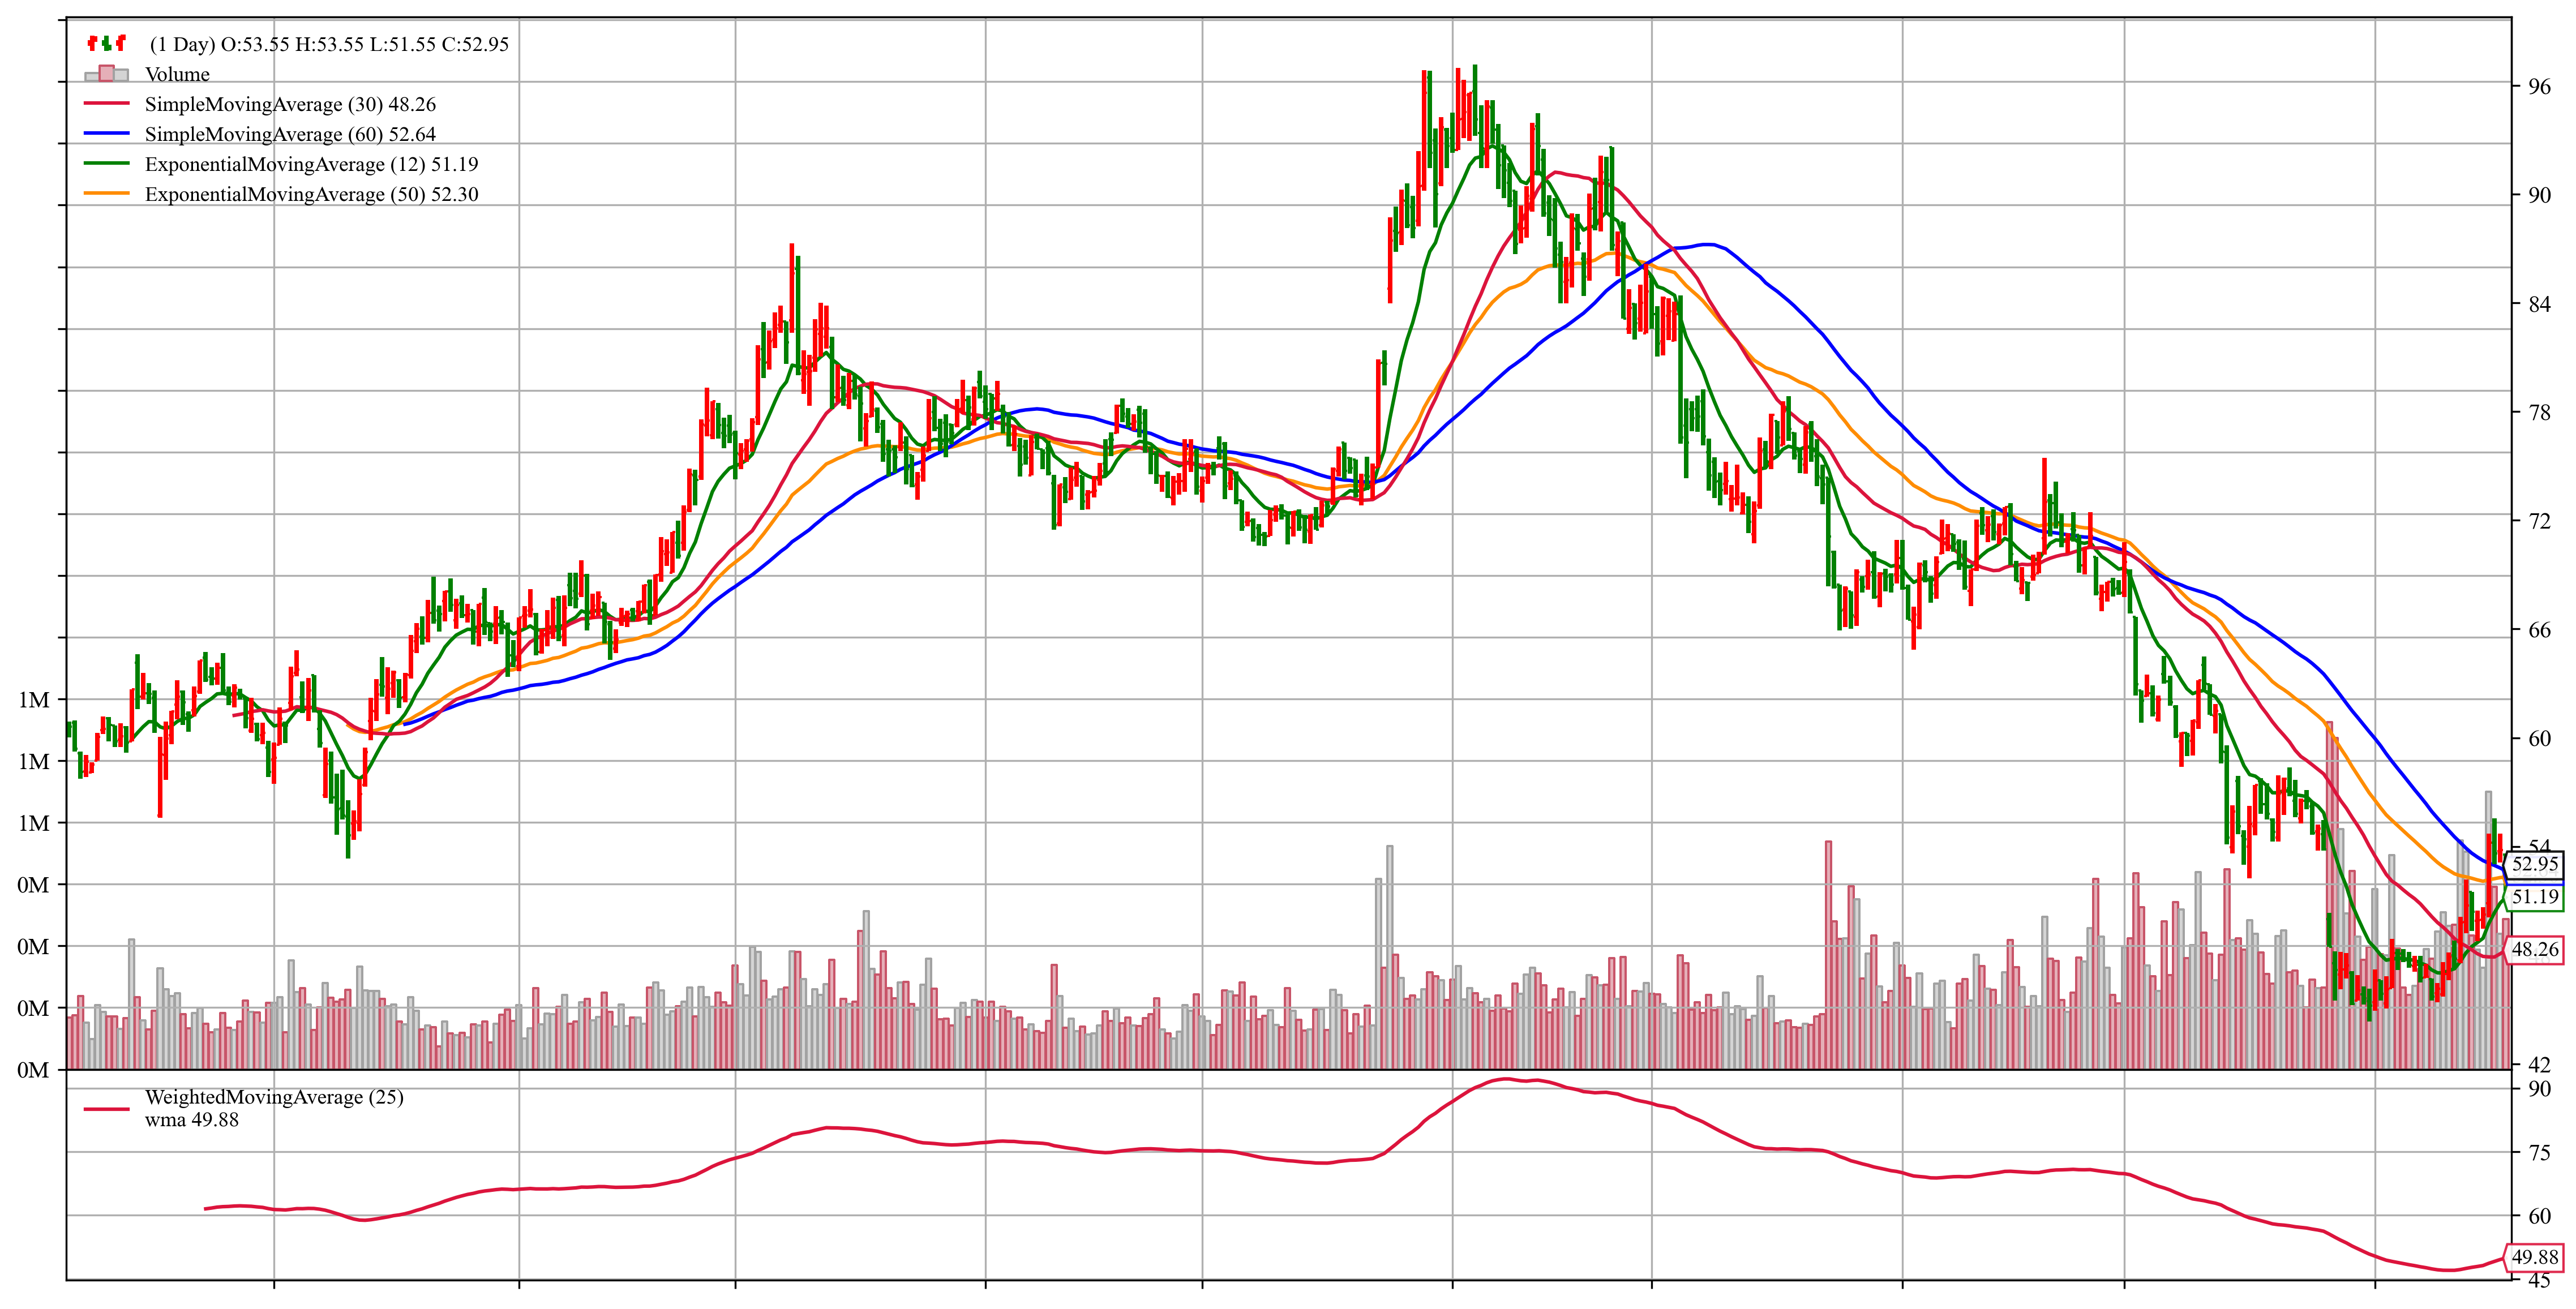

[[<Figure size 4800x2400 with 3 Axes>]]

In [8]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 10}) 
plt.rcParams['figure.dpi']=300
plt.rcParams['font.sans-serif'] = ['Times New Roman']


class St(bt.Strategy):
    def __init__(self):
        # self.sma = bt.indicators.SimpleMovingAverage(self.data, period=5)
        # self.sma = bt.indicators.SimpleMovingAverage(self.data, period=10)
        self.sma = bt.indicators.SimpleMovingAverage(self.data, period=30)
        self.sma = bt.indicators.SimpleMovingAverage(self.data, period=60)
        # self.sma = bt.indicators.SimpleMovingAverage(self.data, period=120)

        bt.indicators.ExponentialMovingAverage(self.datas[0], period=12)
        bt.indicators.ExponentialMovingAverage(self.datas[0], period=50)

        bt.indicators.WeightedMovingAverage(self.datas[0], period=25, subplot=True)
        
        # bt.indicators.StochasticSlow(self.datas[0], period=9, plotname='KD')
        # bt.indicators.MACDHisto(self.datas[0])

        # rsi = bt.indicators.RSI(self.datas[0])
        # bt.indicators.SmoothedMovingAverage(rsi, period=10)
        # bt.indicators.ATR(self.datas[0])

cerebro = bt.Cerebro()
data = bt.feeds.PandasData(dataname=df)
cerebro.adddata(data)
cerebro.addstrategy(St)
# stdstats=False 关闭资金监控板、交易监控板
cerebro.run(stdstats=False)
cerebro.plot(iplot = False,style='bar',barup = 'red', bardown = 'green')